# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [6]:
%pip install --upgrade plotly

     |████████████████████████████████| 15.2 MB 7.6 MB/s eta 0:00:01
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [9]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


# This might be helpful:
from collections import Counter

## Notebook Presentation

In [10]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [11]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration
#### What is the shape of the DataFrames? 
#### How many rows and columns do they have
#### What are the column names

#### Are there any NaN values or duplicates

##### df_hh_income

In [12]:
df_hh_income #29322 rows × 3 columns

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667
...,...,...,...
29317,WY,Woods Landing-Jelm CDP,NaN
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500


In [13]:
df_hh_income.columns

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

In [14]:
df_hh_income.duplicated().sum()

0

In [15]:
df_hh_income.isnull().sum()

Geographic Area     0
City                0
Median Income      51
dtype: int64

##### df_pct_poverty

In [16]:
df_pct_poverty #29329 rows × 3 columns

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4


In [17]:
df_pct_poverty.columns

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

In [18]:
df_pct_poverty.duplicated().sum()

0

In [19]:
df_pct_poverty.isnull().sum()

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

##### df_pct_completed_hs

In [20]:
df_pct_completed_hs #29329 rows × 3 columns

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [21]:
df_pct_completed_hs.columns

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

In [22]:
df_pct_completed_hs.duplicated().sum()

0

In [23]:
df_pct_completed_hs.isnull().sum()

Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

##### df_share_race_city

In [24]:
df_share_race_city  #29268 rows × 7 columns

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [25]:
df_share_race_city.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [26]:
df_share_race_city.duplicated().sum()

0

In [27]:
df_share_race_city.isnull().sum()

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

##### df_fatalities

In [28]:
df_fatalities  #2535 rows × 14 columns

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [29]:
df_fatalities.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [30]:
df_fatalities.duplicated().sum()

0

In [31]:
df_fatalities.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [32]:
df_hh_income = df_hh_income.replace({np.nan : 0})

In [33]:
df_hh_income.isnull().sum()

Geographic Area    0
City               0
Median Income      0
dtype: int64

In [34]:
df_fatalities = df_fatalities.replace({np.nan : 0})

In [35]:
df_fatalities.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [36]:
df_pct_poverty = df_pct_poverty.sort_values(ascending = False, by = 'poverty_rate')

In [37]:
df_pct_poverty = df_pct_poverty.replace({'-' : 0})

In [38]:
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].astype(float)

In [39]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))

/var/folders/44/vjzhcxkd18ncdl83w2l3jc6c0000gn/T/ipykernel_4786/1693907628.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


<AxesSubplot:xlabel='City', ylabel='poverty_rate'>

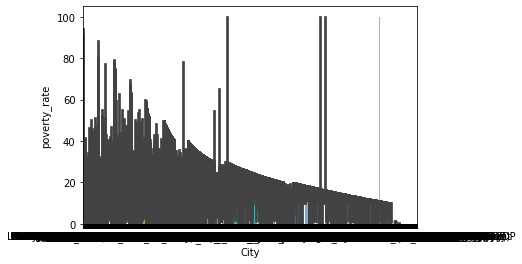

In [40]:
sns.barplot(data = df_pct_poverty, x = 'City', y = 'poverty_rate')

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [41]:
df_pct_completed_hs

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [42]:
df_pct_completed_hs = df_pct_completed_hs[['City', 'percent_completed_hs']].sort_values(ascending = True, by = 'percent_completed_hs')

In [43]:
df_pct_completed_hs

,City,percent_completed_hs
14024,Goss town,-
770,Loring CDP,-
14570,Tarrants village,-
1113,Hunter Creek CDP,-
16280,Ross Corner CDP,-
...,...,...
7176,Scott AFB CDP,99.8
26212,West Lake Hills city,99.8
23070,Toftrees CDP,99.8
25983,Serenada CDP,99.9


In [44]:
df_pct_completed_hs = df_pct_completed_hs.replace({'-' : 0})

In [45]:
df_pct_completed_hs

,City,percent_completed_hs
14024,Goss town,0
770,Loring CDP,0
14570,Tarrants village,0
1113,Hunter Creek CDP,0
16280,Ross Corner CDP,0
...,...,...
7176,Scott AFB CDP,99.8
26212,West Lake Hills city,99.8
23070,Toftrees CDP,99.8
25983,Serenada CDP,99.9


<AxesSubplot:xlabel='City', ylabel='percent_completed_hs'>

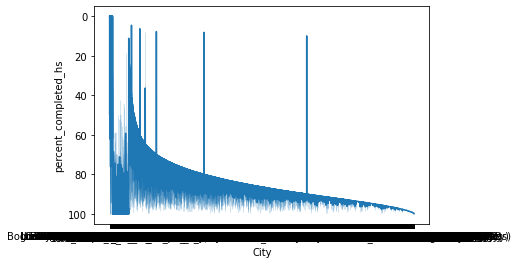

In [46]:
sns.lineplot(data = df_pct_completed_hs, x = 'City', y = 'percent_completed_hs')

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [47]:
df_pct_poverty

,Geographic Area,City,poverty_rate
4472,FL,Homestead Base CDP,98.60
23716,SD,Allen CDP,94.10
20428,OK,Badger Lee CDP,93.80
27738,WA,Outlook CDP,93.80
26509,UT,Randlett CDP,93.50
...,...,...,...
24980,TX,El Mesquite CDP,0.00
2864,CA,Myers Flat CDP,0.00
10747,LA,Sugartown CDP,0.00
16400,NJ,Zarephath CDP,0.00


In [48]:
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")

In [49]:
df_pct_completed_hs

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [50]:
ci1 = df_pct_completed_hs.sort_values(ascending = True, by = 'City')

In [51]:
ci1 = pd.DataFrame(ci1)

In [52]:
ci1

,Geographic Area,City,percent_completed_hs
21515,PA,Aaronsburg CDP (Centre County),92.2
21516,PA,Aaronsburg CDP (Washington County),83.1
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
23313,SC,Abbeville city,79.5
...,...,...,...
13287,MN,Zumbrota city,93.5
16843,NM,Zuni Pueblo CDP,72.4
9784,KS,Zurich city,91.7
9112,IA,Zwingle city,85


In [53]:
ci2 = df_pct_poverty.sort_values(ascending = True, by = 'City')

In [54]:
ci2 = pd.DataFrame(ci2)

In [55]:
ci2

,Geographic Area,City,poverty_rate
21515,PA,Aaronsburg CDP (Centre County),8.50
21516,PA,Aaronsburg CDP (Washington County),29.50
0,AL,Abanda CDP,78.80
5052,GA,Abbeville city,37.70
10325,LA,Abbeville city,28.10
...,...,...,...
13287,MN,Zumbrota city,12.70
16843,NM,Zuni Pueblo CDP,37.50
9784,KS,Zurich city,20.20
9112,IA,Zwingle city,17.60


In [56]:
ci1['poverty_rate'] = ci2['poverty_rate']

In [57]:
ci1

,Geographic Area,City,percent_completed_hs,poverty_rate
21515,PA,Aaronsburg CDP (Centre County),92.2,8.50
21516,PA,Aaronsburg CDP (Washington County),83.1,29.50
0,AL,Abanda CDP,21.2,78.80
1,AL,Abbeville city,69.1,29.10
23313,SC,Abbeville city,79.5,38.90
...,...,...,...,...
13287,MN,Zumbrota city,93.5,12.70
16843,NM,Zuni Pueblo CDP,72.4,37.50
9784,KS,Zurich city,91.7,20.20
9112,IA,Zwingle city,85,17.60


In [ ]:
sns.barplot(data = ci1, x = 'City', y = 'poverty_rate',  hue = 'percent_completed_hs')

In [597]:
ci1

,Geographic Area,City,percent_completed_hs,poverty_rate
21515,PA,Aaronsburg CDP (Centre County),92.2,8.50
21516,PA,Aaronsburg CDP (Washington County),83.1,29.50
0,AL,Abanda CDP,21.2,78.80
1,AL,Abbeville city,69.1,29.10
23313,SC,Abbeville city,79.5,38.90
...,...,...,...,...
13287,MN,Zumbrota city,93.5,12.70
16843,NM,Zuni Pueblo CDP,72.4,37.50
9784,KS,Zurich city,91.7,20.20
9112,IA,Zwingle city,85,17.60


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

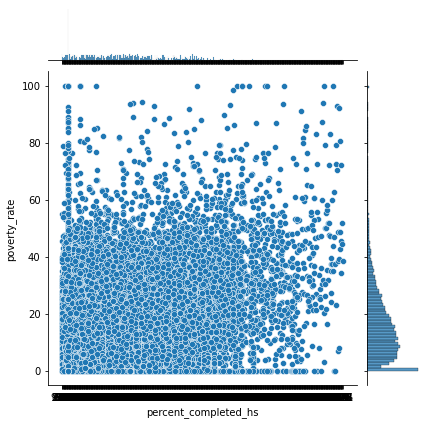

In [598]:
sns.jointplot(data = ci1, x = 'percent_completed_hs', y = 'poverty_rate', kind = 'scatter')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

In [604]:
ci1 = ci1.replace({'-' : 0})

In [605]:
ci1

,Geographic Area,City,percent_completed_hs,poverty_rate
21515,PA,Aaronsburg CDP (Centre County),92.2,8.50
21516,PA,Aaronsburg CDP (Washington County),83.1,29.50
0,AL,Abanda CDP,21.2,78.80
1,AL,Abbeville city,69.1,29.10
23313,SC,Abbeville city,79.5,38.90
...,...,...,...,...
13287,MN,Zumbrota city,93.5,12.70
16843,NM,Zuni Pueblo CDP,72.4,37.50
9784,KS,Zurich city,91.7,20.20
9112,IA,Zwingle city,85,17.60


In [610]:
ci1[['percent_completed_hs', 'poverty_rate']] = ci1[['percent_completed_hs', 'poverty_rate']].astype(float)

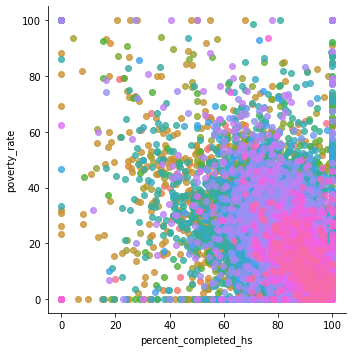

In [615]:
sns.lmplot(data = ci1, x = 'percent_completed_hs', y = 'poverty_rate', hue = 'Geographic Area', legend = False, fit_reg = False)

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [617]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [628]:
df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].replace({'(X)' : 0})

In [630]:
df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].astype(float)

In [631]:
df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']]

,share_white,share_black,share_native_american,share_asian,share_hispanic
0,67.20,30.20,0.00,0.00,1.60
1,54.40,41.40,0.10,1.00,3.10
2,52.30,44.90,0.50,0.30,2.30
3,99.10,0.10,0.00,0.10,0.40
4,13.20,86.50,0.00,0.00,0.30
...,...,...,...,...,...
29263,95.90,0.00,0.00,2.10,0.00
29264,89.90,0.30,1.30,0.60,16.60
29265,94.50,0.10,1.40,0.20,6.20
29266,97.40,0.00,0.00,0.00,4.00


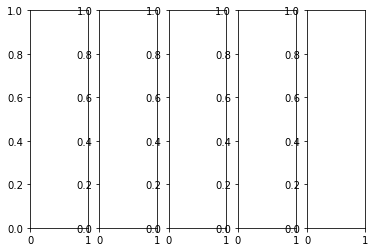

In [641]:
fig, ax = plt.subplots(ncols=5)

In [644]:
sns.barplot(data = df_share_race_city, x = 'City', y = 'share_white', ax = ax[0])

<AxesSubplot:xlabel='City', ylabel='share_white'>

In [646]:
sns.barplot(data = df_share_race_city, x = 'City', y = 'share_black', ax = ax[1])

<AxesSubplot:xlabel='City', ylabel='share_black'>

In [647]:
sns.barplot(data = df_share_race_city, x = 'City', y = 'share_native_american', ax = ax[2])

<AxesSubplot:xlabel='City', ylabel='share_native_american'>

In [649]:
sns.barplot(data = df_share_race_city, x = 'City', y = 'share_asian', ax = ax[3])

<AxesSubplot:xlabel='City', ylabel='share_asian'>

In [651]:
sns.barplot(data = df_share_race_city, x = 'City', y = 'share_hispanic', ax = ax[4])

<AxesSubplot:xlabel='City', ylabel='share_hispanic'>

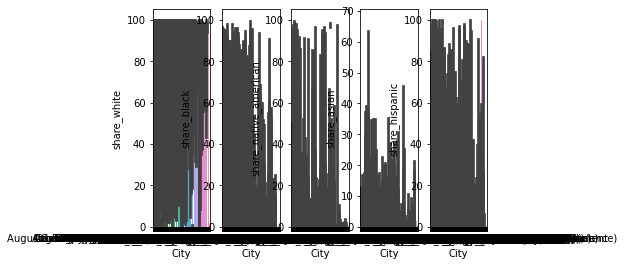

In [652]:
fig

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`   다시 확인해야함

In [722]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [726]:
a = df_fatalities['race'].value_counts()

In [727]:
a

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [728]:
a = a.dropna()

In [775]:
labels = a.index

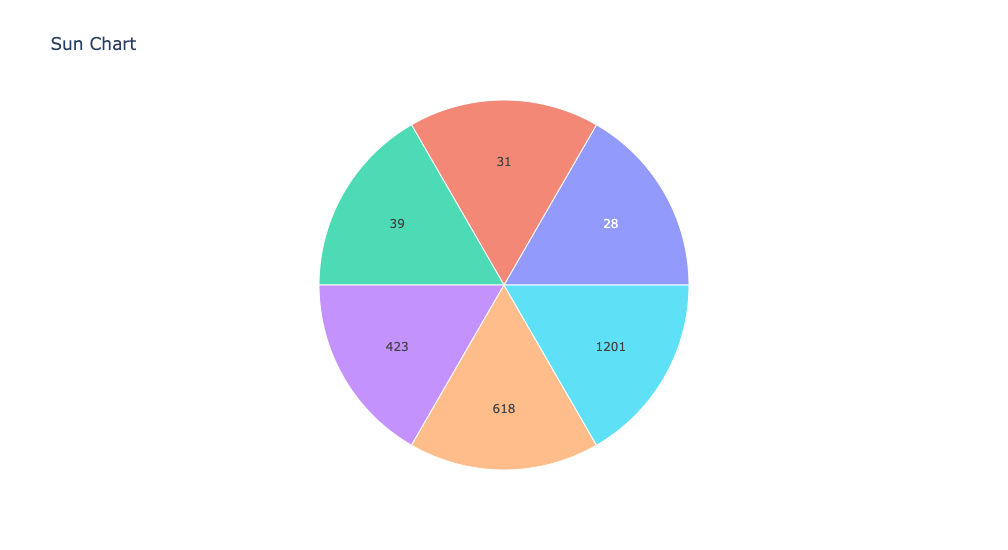

In [776]:
cri = px.sunburst(a,
                  path= ['race'],
                  title="Sun Chart",
                  labels = labels,
                  width=550, height=550)
cri.show()

In [777]:
# 도넛으로 다시 만들어야함

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [778]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [927]:
ge = df_fatalities['gender'].value_counts()

In [928]:
ge

M    2428
F     107
Name: gender, dtype: int64

<AxesSubplot:ylabel='gender'>

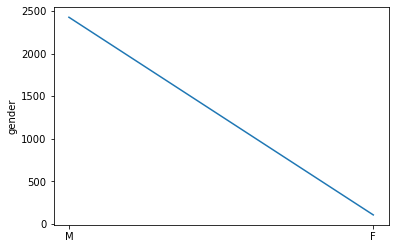

In [ ]:
sns.lineplot(data = ge)

<AxesSubplot:>

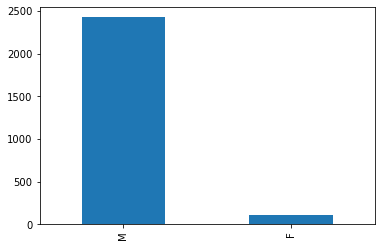

In [934]:
ge.plot(kind = 'bar')

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [939]:
df_fatalities[['manner_of_death', 'age']]

,manner_of_death,age
0,shot,53.00
1,shot,47.00
2,shot and Tasered,23.00
3,shot,32.00
4,shot,39.00
...,...,...
2530,shot,31.00
2531,shot,NaN
2532,shot,48.00
2533,shot,28.00


<AxesSubplot:xlabel='manner_of_death', ylabel='age'>

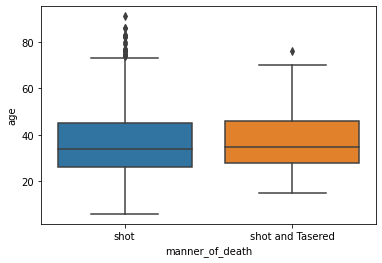

In [940]:
sns.boxplot(data = df_fatalities, x = 'manner_of_death', y = 'age')

<AxesSubplot:xlabel='manner_of_death', ylabel='age'>

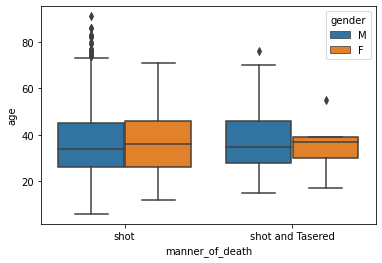

In [941]:
sns.boxplot(data = df_fatalities, x = 'manner_of_death', y = 'age', hue = 'gender')

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 


사람들은 무장했는가?

경찰 살인의 몇 퍼센트에서 사람들이 무장했습니까? 고인이 소지한 무기(있는 경우)가 무엇인지 보여주는 차트를 만듭니다. 경찰에 의해 살해된 사람 중 총으로 무장한 사람과 비무장한 사람이 몇 명이나 되었습니까?

In [1545]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
153,268,Donald Lewis Matkins,2015-01-03,shot,gun,49.00,M,W,Barton,MS,False,attack,Not fleeing,False
154,194,Charly Leundeu Keunang,2015-01-03,shot and Tasered,unarmed,43.00,M,B,Los Angeles,CA,True,attack,Not fleeing,True
155,195,Hung Trieu,2015-01-03,shot,gun,35.00,M,A,Houston,TX,False,attack,Not fleeing,False
246,533,Shawn Clyde,2015-01-04,shot,knife,36.00,M,W,Hamilton,NJ,False,attack,Not fleeing,False
245,267,Robert Washington,2015-01-04,shot,gun,37.00,M,B,Hawthorne,CA,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397,2659,John Wesley Bays,2017-12-06,shot,gun,50.00,M,W,Trosper,KY,False,attack,Not fleeing,False
2395,2656,Johnny Platas,2017-12-06,shot and Tasered,knife,45.00,M,H,Selma,CA,False,other,Not fleeing,False
2486,2771,Dorsey Glenn Taulbee Jr.,2017-12-07,shot,gun,33.00,M,NaN,Oklahoma City,OK,False,attack,Not fleeing,False
2487,2772,James Gerald Davis,2017-12-07,shot,NaN,40.00,M,NaN,Lake View,SC,False,undetermined,NaN,False


In [1557]:
df_fatalities['armed'][df_fatalities['armed'] == 'gun'].value_counts()

gun    1398
Name: armed, dtype: int64

In [1549]:
df_fatalities['armed'].isin(['gun']).value_counts()[:1]

True    1398
Name: armed, dtype: int64

# How Old Were the People Killed?

#### Work out what percentage of people killed were under 25 years old.  

In [1011]:
df_fatalities['age']

0      53.00
1      47.00
2      23.00
3      32.00
4      39.00
        ... 
2530   31.00
2531     NaN
2532   48.00
2533   28.00
2534   32.00
Name: age, Length: 2535, dtype: float64

In [1518]:
a = df_fatalities['age'].value_counts().sum()

In [1520]:
a

2458

In [1519]:
b = df_fatalities['age'][df_fatalities['age'] < 25].value_counts().sum()

In [1521]:
b

450

In [1524]:
(b / a) * 100

18.307567127746136

#### Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 


In [1293]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [1289]:
df_fatalities['age']

0      53.00
1      47.00
2      23.00
3      32.00
4      39.00
        ... 
2530   31.00
2531     NaN
2532   48.00
2533   28.00
2534   32.00
Name: age, Length: 2535, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Density'>

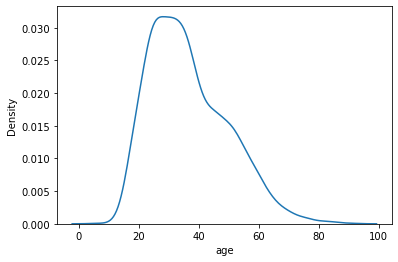

In [1290]:
sns.kdeplot(data = df_fatalities['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

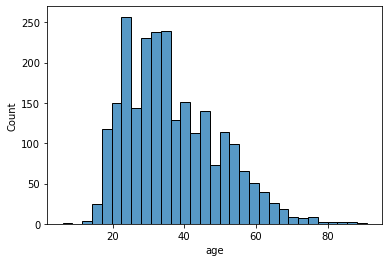

In [1292]:
sns.histplot(data = df_fatalities['age'])

#### Create a seperate KDE plot for each race. Is there a difference between the distributions? 

<AxesSubplot:ylabel='Density'>

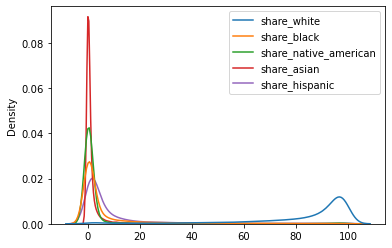

In [1022]:
sns.kdeplot(data = df_share_race_city)

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [1185]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [1174]:
ra = df_fatalities['race'].value_counts()

In [1175]:
ra

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [1176]:
ra = pd.DataFrame(ra)

In [1177]:
ra = ra.reset_index()

In [1178]:
ra

,index,race
0,W,1201
1,B,618
2,H,423
3,A,39
4,N,31
5,O,28


In [1179]:
ra = ra.rename({'race' : 'count', 'index' : 'race'},axis = 1)

In [1180]:
ra

,race,count
0,W,1201
1,B,618
2,H,423
3,A,39
4,N,31
5,O,28


<AxesSubplot:xlabel='race', ylabel='count'>

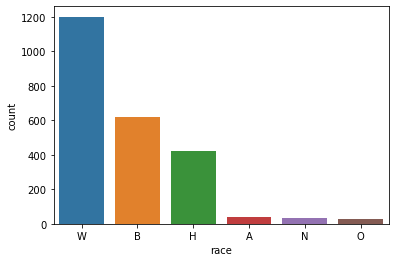

In [1183]:
sns.barplot(data = ra, x = 'race', y = 'count')

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?


정신 질환 및 경찰 살해

경찰에 의해 사망한 사람들의 몇 퍼센트가 정신 질환 진단을 받았습니까?

In [1201]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [1533]:
a = df_fatalities['signs_of_mental_illness'].value_counts().sum()

In [1534]:
a

2535

In [1535]:
b = df_fatalities['signs_of_mental_illness'][df_fatalities['signs_of_mental_illness']].value_counts().sum()

In [1536]:
b

633

In [1539]:
(b / a) * 100

24.970414201183434

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [1233]:
ci = df_fatalities['city'].value_counts()[:10]

In [1237]:
ci = pd.DataFrame(ci)

In [1241]:
ci = ci.reset_index()

In [1242]:
ci

,index,city
0,Los Angeles,39
1,Phoenix,31
2,Houston,27
3,Chicago,25
4,Las Vegas,21
5,San Antonio,20
6,Columbus,19
7,Austin,18
8,Miami,18
9,St. Louis,15


<AxesSubplot:xlabel='index', ylabel='city'>

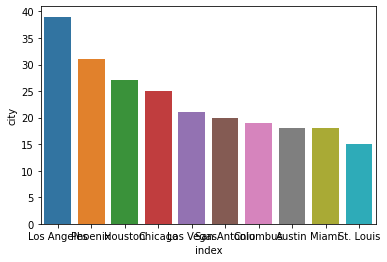

In [1243]:
sns.barplot(data = ci, x = 'index', y = 'city')

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [1352]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville city,52.30,44.90,0.50,0.30,2.30
3,AL,Addison town,99.10,0.10,0.00,0.10,0.40
4,AL,Akron town,13.20,86.50,0.00,0.00,0.30
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.90,0.00,0.00,2.10,0.00
29264,WY,Worland city,89.90,0.30,1.30,0.60,16.60
29265,WY,Wright town,94.50,0.10,1.40,0.20,6.20
29266,WY,Yoder town,97.40,0.00,0.00,0.00,4.00


In [ ]:
df_share_race_city['City'].value_counts()[:10]

Franklin city        16
Salem city           14
Marion city          14
Madison city         14
Auburn city          13
Clinton city         13
Springfield city     13
Greenville city      12
Aurora city          12
Mount Vernon city    11
Name: City, dtype: int64

In [1431]:
df_share_race_city[df_share_race_city['City'] == 'Franklin city'].sum()

Geographic area                           GAIDINIAKYLAMNMONENHOHPATNTXVAWI
City                     Franklin cityFranklin cityFranklin cityFrankli...
share_white                                                       1,332.10
share_black                                                         193.30
share_native_american                                                 7.50
share_asian                                                          17.60
share_hispanic                                                       57.50
dtype: object

In [1432]:
df_share_race_city[df_share_race_city['City'] == 'Salem city'].sum()

Geographic area                               ARILINIAKYMAMONJOHORSDUTVAWV
City                     Salem citySalem citySalem citySalem citySalem ...
share_white                                                       1,244.70
share_black                                                          84.60
share_native_american                                                 6.80
share_asian                                                          11.50
share_hispanic                                                       63.20
dtype: object

In [1433]:
df_share_race_city[df_share_race_city['City'] == 'Marion city'].sum()

Geographic area                               ALARILINIAKSKYNCNDOHSCSDTXWI
City                     Marion cityMarion cityMarion cityMarion cityMa...
share_white                                                       1,119.50
share_black                                                         214.20
share_native_american                                                 6.20
share_asian                                                          10.30
share_hispanic                                                       80.90
dtype: object

In [1434]:
df_share_race_city[df_share_race_city['City'] == 'Auburn city'].sum()

Geographic area                                 ALCAGAILINIAKSKYMEMINENYWA
City                     Auburn cityAuburn cityAuburn cityAuburn cityAu...
share_white                                                       1,173.90
share_black                                                          47.20
share_native_american                                                 6.70
share_asian                                                          24.60
share_hispanic                                                       52.10
dtype: object

In [1435]:
df_share_race_city[df_share_race_city['City'] == 'Clinton city'].sum()

Geographic area                                 ARILINIAKYMNMSMONCOKSCTNUT
City                     Clinton cityClinton cityClinton cityClinton ci...
share_white                                                       1,063.70
share_black                                                         152.00
share_native_american                                                11.70
share_asian                                                          11.80
share_hispanic                                                       72.20
dtype: object

In [1436]:
df_share_race_city[df_share_race_city['City'] == 'Springfield city'].sum()

Geographic area                                 FLGAILKYMAMIMNMONEOHORSDTN
City                     Springfield citySpringfield citySpringfield ci...
share_white                                                         991.20
share_black                                                         173.60
share_native_american                                                29.10
share_asian                                                          21.80
share_hispanic                                                      107.30
dtype: object

In [1437]:
df_share_race_city[df_share_race_city['City'] == 'Greenville city'].sum()

Geographic area                                   ALGAILIAKYMIMSMONCOHSCTX
City                     Greenville cityGreenville cityGreenville cityG...
share_white                                                         830.30
share_black                                                         312.40
share_native_american                                                 8.50
share_asian                                                          11.20
share_hispanic                                                       52.30
dtype: object

In [1438]:
df_share_race_city[df_share_race_city['City'] == 'Aurora city'].sum()

Geographic area                                   COILINIAKSMNMONEOHORTXUT
City                     Aurora cityAurora cityAurora cityAurora cityAu...
share_white                                                       1,062.30
share_black                                                          32.50
share_native_american                                                 8.50
share_asian                                                          14.90
share_hispanic                                                      119.00
dtype: object

In [1439]:
df_share_race_city[df_share_race_city['City'] == 'Mount Vernon city'].sum()

Geographic area                                     GAILINIAKYMONYOHORSDWA
City                     Mount Vernon cityMount Vernon cityMount Vernon...
share_white                                                         894.70
share_black                                                         127.50
share_native_american                                                10.20
share_asian                                                           9.90
share_hispanic                                                       69.10
dtype: object

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 


In [1456]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

In [1459]:
df_fatalities['date']

0      2015-02-01
1      2015-02-01
2      2015-03-01
3      2015-04-01
4      2015-04-01
          ...    
2530   2017-07-28
2531   2017-07-28
2532   2017-07-29
2533   2017-07-31
2534   2017-07-31
Name: date, Length: 2535, dtype: datetime64[ns]

In [1476]:
df_fatalities.sort_values(by = 'date')

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
153,268,Donald Lewis Matkins,2015-01-03,shot,gun,49.00,M,W,Barton,MS,False,attack,Not fleeing,False
154,194,Charly Leundeu Keunang,2015-01-03,shot and Tasered,unarmed,43.00,M,B,Los Angeles,CA,True,attack,Not fleeing,True
155,195,Hung Trieu,2015-01-03,shot,gun,35.00,M,A,Houston,TX,False,attack,Not fleeing,False
246,533,Shawn Clyde,2015-01-04,shot,knife,36.00,M,W,Hamilton,NJ,False,attack,Not fleeing,False
245,267,Robert Washington,2015-01-04,shot,gun,37.00,M,B,Hawthorne,CA,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398,2663,Avery D. Metrejean,2017-12-06,shot,gun,35.00,M,W,Cade,LA,False,other,Not fleeing,False
2395,2656,Johnny Platas,2017-12-06,shot and Tasered,knife,45.00,M,H,Selma,CA,False,other,Not fleeing,False
2487,2772,James Gerald Davis,2017-12-07,shot,NaN,40.00,M,NaN,Lake View,SC,False,undetermined,NaN,False
2486,2771,Dorsey Glenn Taulbee Jr.,2017-12-07,shot,gun,33.00,M,NaN,Oklahoma City,OK,False,attack,Not fleeing,False


In [1488]:
da = pd.DataFrame(df_fatalities['date'].value_counts())

In [1489]:
da = da.reset_index()

In [1490]:
da

,index,date
0,2017-10-02,8
1,2016-12-21,8
2,2017-01-24,8
3,2016-01-27,8
4,2015-12-14,8
...,...,...
874,2015-06-02,1
875,2016-07-15,1
876,2016-07-14,1
877,2016-07-11,1


In [1491]:
da = da.sort_values(by = 'index')

In [1501]:
da = da.rename({'date' : 'count','index' : 'date'}, axis = 1)

In [1502]:
da

,date,count
399,2015-01-03,3
615,2015-01-04,2
738,2015-01-06,1
550,2015-01-07,2
552,2015-01-08,2
...,...,...
551,2017-12-03,2
736,2017-12-04,1
266,2017-12-05,4
268,2017-12-06,4


<AxesSubplot:xlabel='date', ylabel='count'>

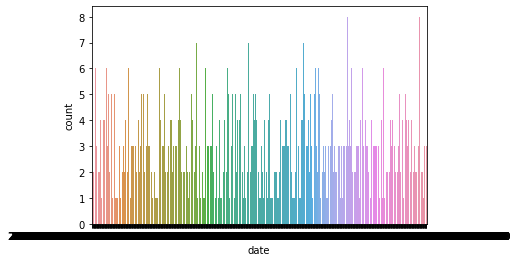

In [1503]:
sns.barplot(data = da, x = 'date', y = 'count')

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).